# Data exploration

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime

from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Option to display all the dataframe columns
pd.options.display.max_columns = None

In [2]:
# Importing dataset
df = pd.read_csv("dataset/train_original.csv")

# Transform dates from '%d/%m/%Y' to datetime objects.
def transform_date(x):
    date = datetime.datetime.strptime(x, '%d/%m/%Y')
    return date

df['Date'] = df['Date'].map(transform_date)

First of all, we analyse the distribution of the target value, **NumberOfSales**

C:\Users\Irons\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



mu = 4057.38 and sigma = 2729.63

Skewness: 0.655949
Kurtosis: 1.756632


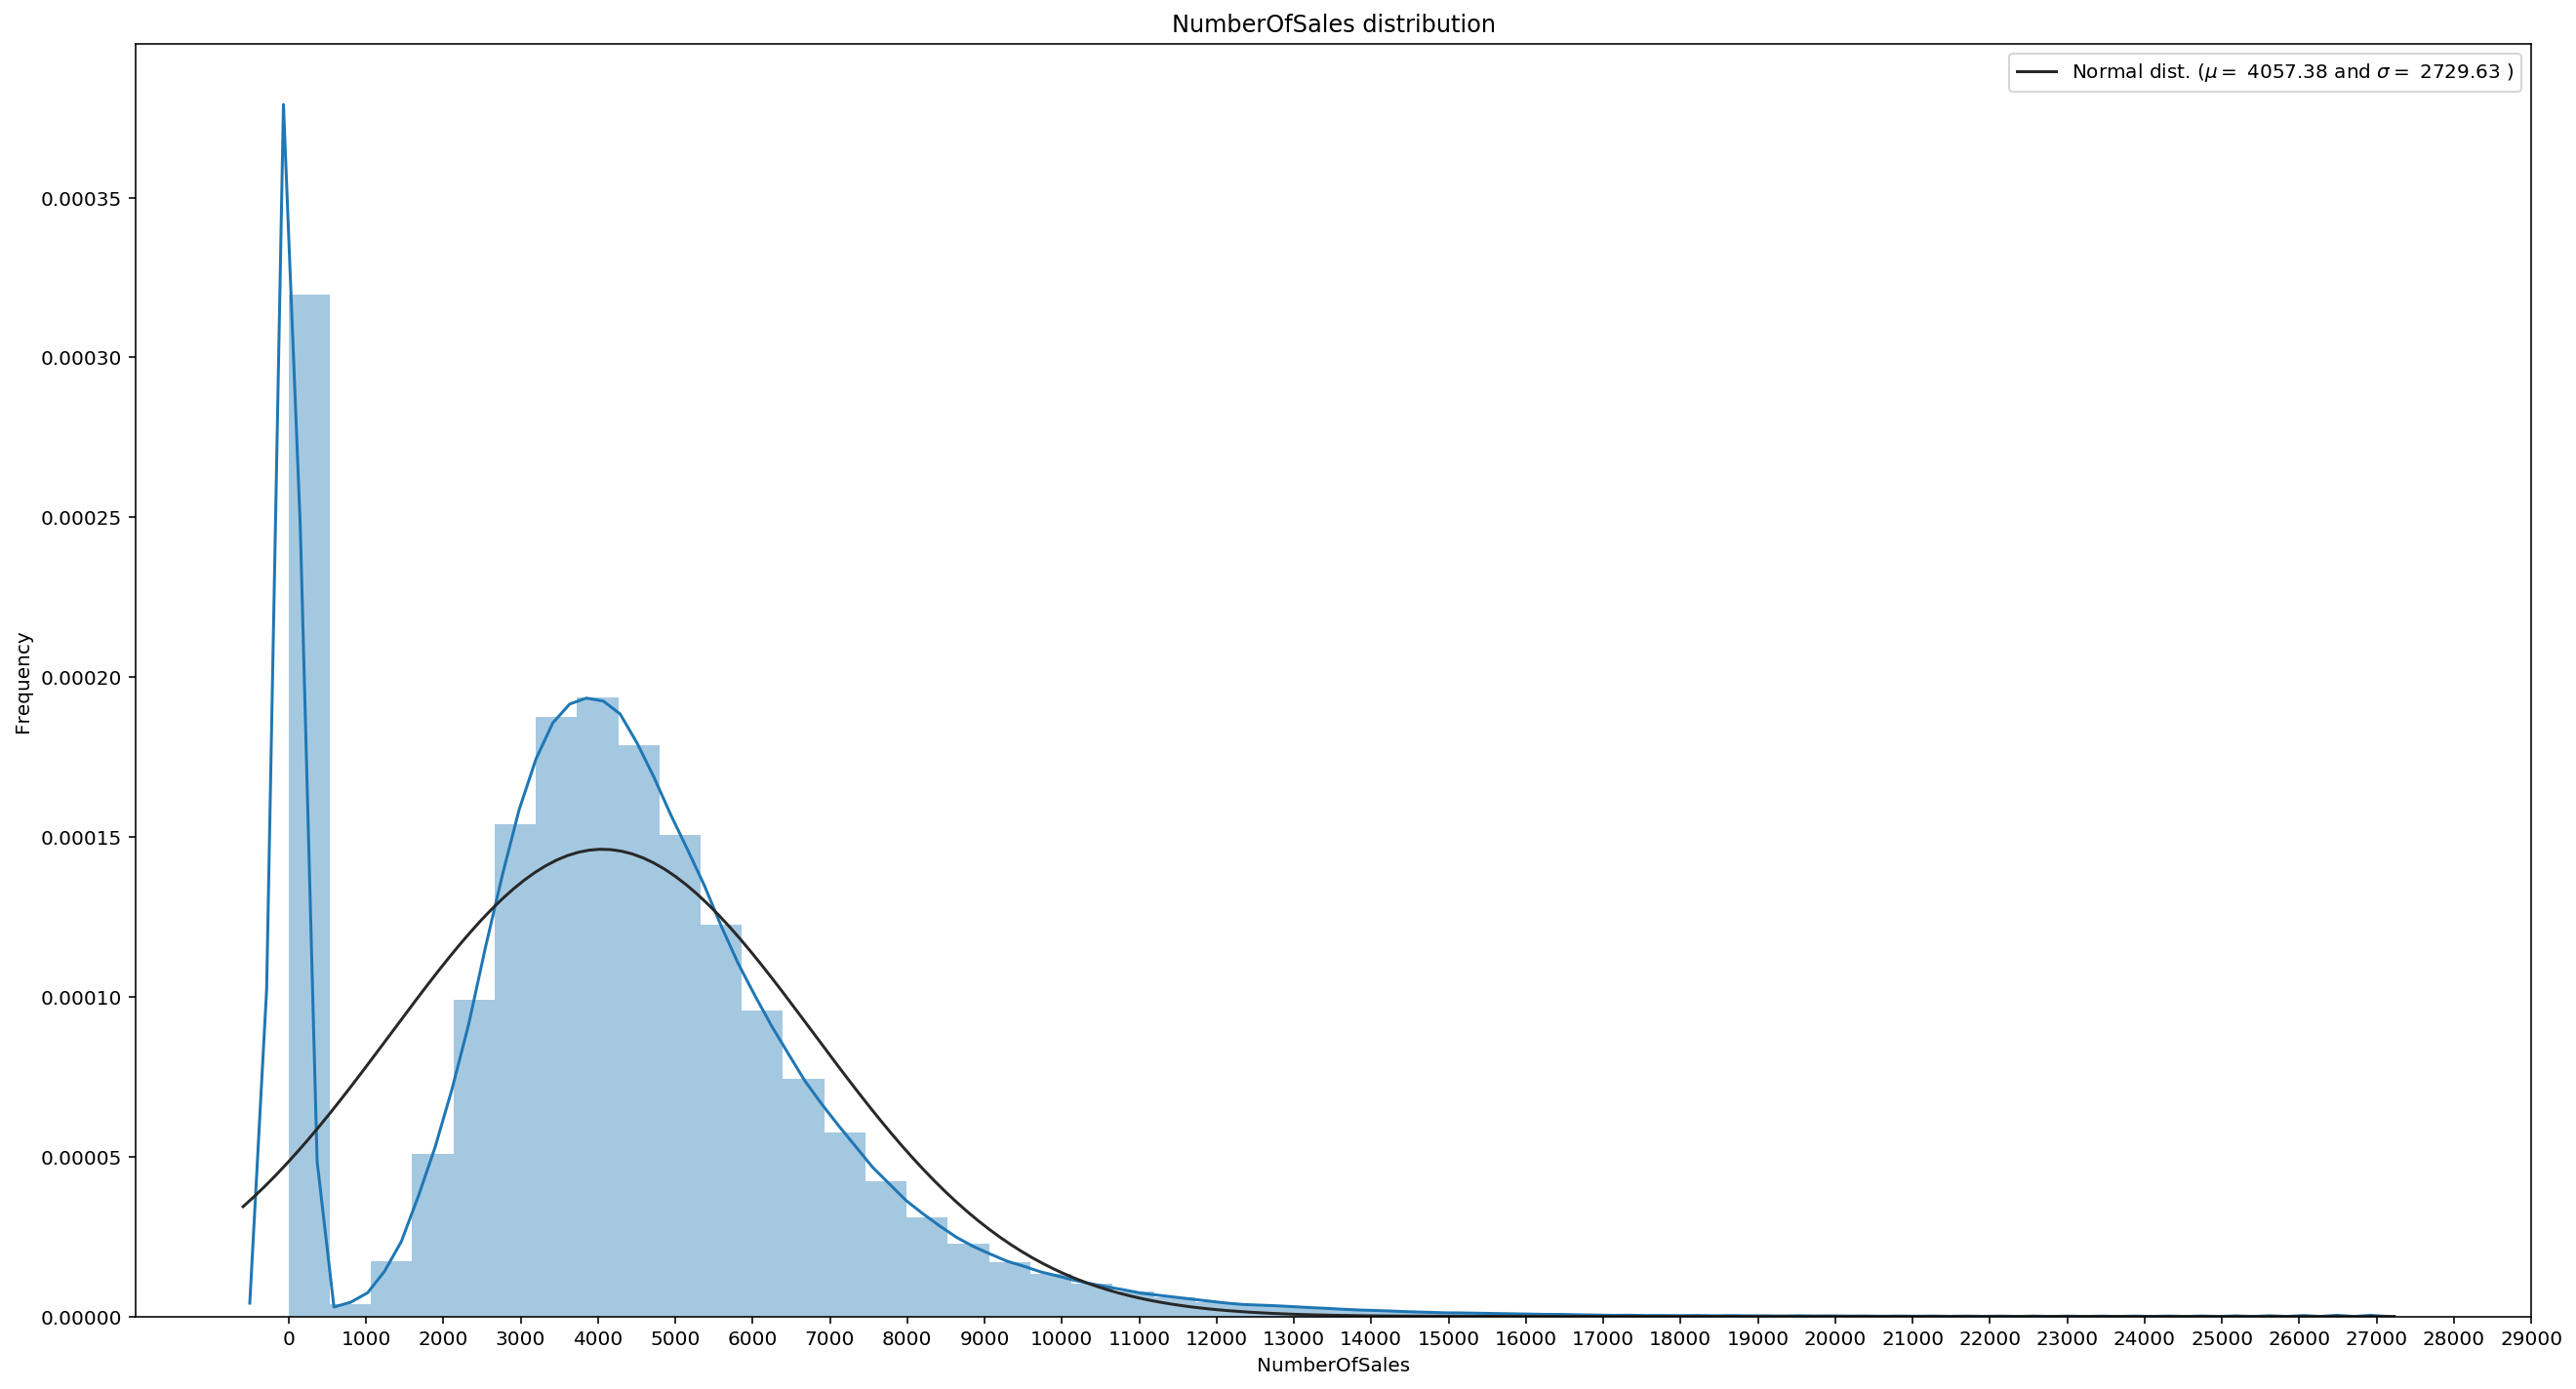

In [3]:
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0)
# Try and fit the data with a normal distribution
sns.distplot(df['NumberOfSales'] , fit=norm)

(mu, sigma) = norm.fit(df['NumberOfSales'])
print( '\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % df['NumberOfSales'].skew())
print("Kurtosis: %f" % df['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')
_ = plt.xticks(np.arange(0, 30000, step=1000))

There is an high frequency of **low** number of sales. We should understand the reasons behind this.

Now we split the dataset in two parts: instances with a low number of sales (less than 500) and instances with a high number of sales (more than 500):

In [4]:
# Split the dataset for separate analysis
low_numberofsales = df.loc[df['NumberOfSales'] < 500]
high_numberofsales = df.loc[df['NumberOfSales'] >= 500]

low_numberofsales.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,Max_Dew_PointC,Max_Gust_SpeedKm_h,Max_Humidity,Max_Sea_Level_PressurehPa,Max_TemperatureC,Max_VisibilityKm,Max_Wind_SpeedKm_h,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,81988.000000,89116.000000,20534.000000,89116.000000,89116.000000,89116.000000,87036.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,87036.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,87036.000000,89116.000000,89116.000000
mean,1374.072052,0.169812,0.000595,0.060786,7806.503423,5.643442,0.008629,0.099084,12711.060999,14074.026965,3938.151050,5.512368,8.248362,47.951739,93.467727,1018.080008,13.997644,23.832770,22.538927,5.958941,74.879741,1015.113111,9.968625,12.173859,11.984930,3.438316,51.501391,1012.200559,5.994793,7.084344,0.843646,179.493716
std,217.130480,0.375470,0.024380,0.238939,11026.952750,3.357265,0.576294,6.614012,9260.031519,2730.985161,2817.608143,1.663512,5.983157,11.857954,7.935403,8.039483,8.064845,9.158263,8.590819,5.964200,12.994602,8.254504,6.998007,4.861304,5.733488,6.079839,18.995532,8.597819,6.311125,4.772251,2.556647,103.757893
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,344.000000,9893.000000,816.000000,1.000000,-11.000000,21.000000,48.000000,987.000000,-9.000000,3.000000,6.000000,-15.000000,30.000000,981.000000,-12.000000,0.000000,3.000000,-18.000000,11.000000,977.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,0.000000,0.000000,1043.000000,2.000000,0.000000,0.000000,7215.000000,11849.000000,1584.000000,5.000000,3.000000,40.000000,91.000000,1013.000000,7.000000,11.000000,14.000000,2.000000,66.000000,1010.000000,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,85.000000
50%,1375.000000,0.000000,0.000000,0.000000,3351.000000,6.000000,0.000000,0.000000,9643.000000,15017.000000,2770.000000,6.000000,8.000000,47.000000,94.000000,1019.000000,14.000000,31.000000,21.000000,6.000000,76.000000,1016.000000,10.000000,11.000000,11.000000,4.000000,52.000000,1013.000000,6.000000,8.000000,0.000000,207.000000
75%,1562.000000,0.000000,0.000000,0.000000,9586.000000,9.000000,0.000000,0.000000,15566.000000,15931.000000,5727.000000,7.000000,13.000000,55.000000,100.000000,1024.000000,20.000000,31.000000,27.000000,11.000000,85.000000,1021.000000,15.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,261.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,44.000000,495.000000,32221.000000,23931.000000,8146.000000,8.000000,21.000000,95.000000,100.000000,1042.000000,37.000000,31.000000,68.000000,19.000000,100.000000,1039.000000,30.000000,31.000000,40.000000,17.000000,100.000000,1035.000000,24.000000,31.000000,58.930000,360.000000


As we can see, the mean of NumberOfSales between the instances with less than 500 sales is less than 0.1. This probably means that in almost every one of these instances the store is **closed**:

In [5]:
print('Total number of instances with less than 500 sales: {}'.format(low_numberofsales.shape[0]))
print('Number of instances with less than 500 sales in which the store is open: {}'.format(low_numberofsales['IsOpen'].sum()))

Total number of instances with less than 500 sales: 89116
Number of instances with less than 500 sales in which the store is open: 53


This confirms our assumption. So it makes sense to analyze the complementary portion of the dataset, that with a high number of sales (> 500) to understand its distribution.

C:\Users\Irons\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



mu = 4890.67 and sigma = 2214.92

Skewness: 1.560391
Kurtosis: 4.695395


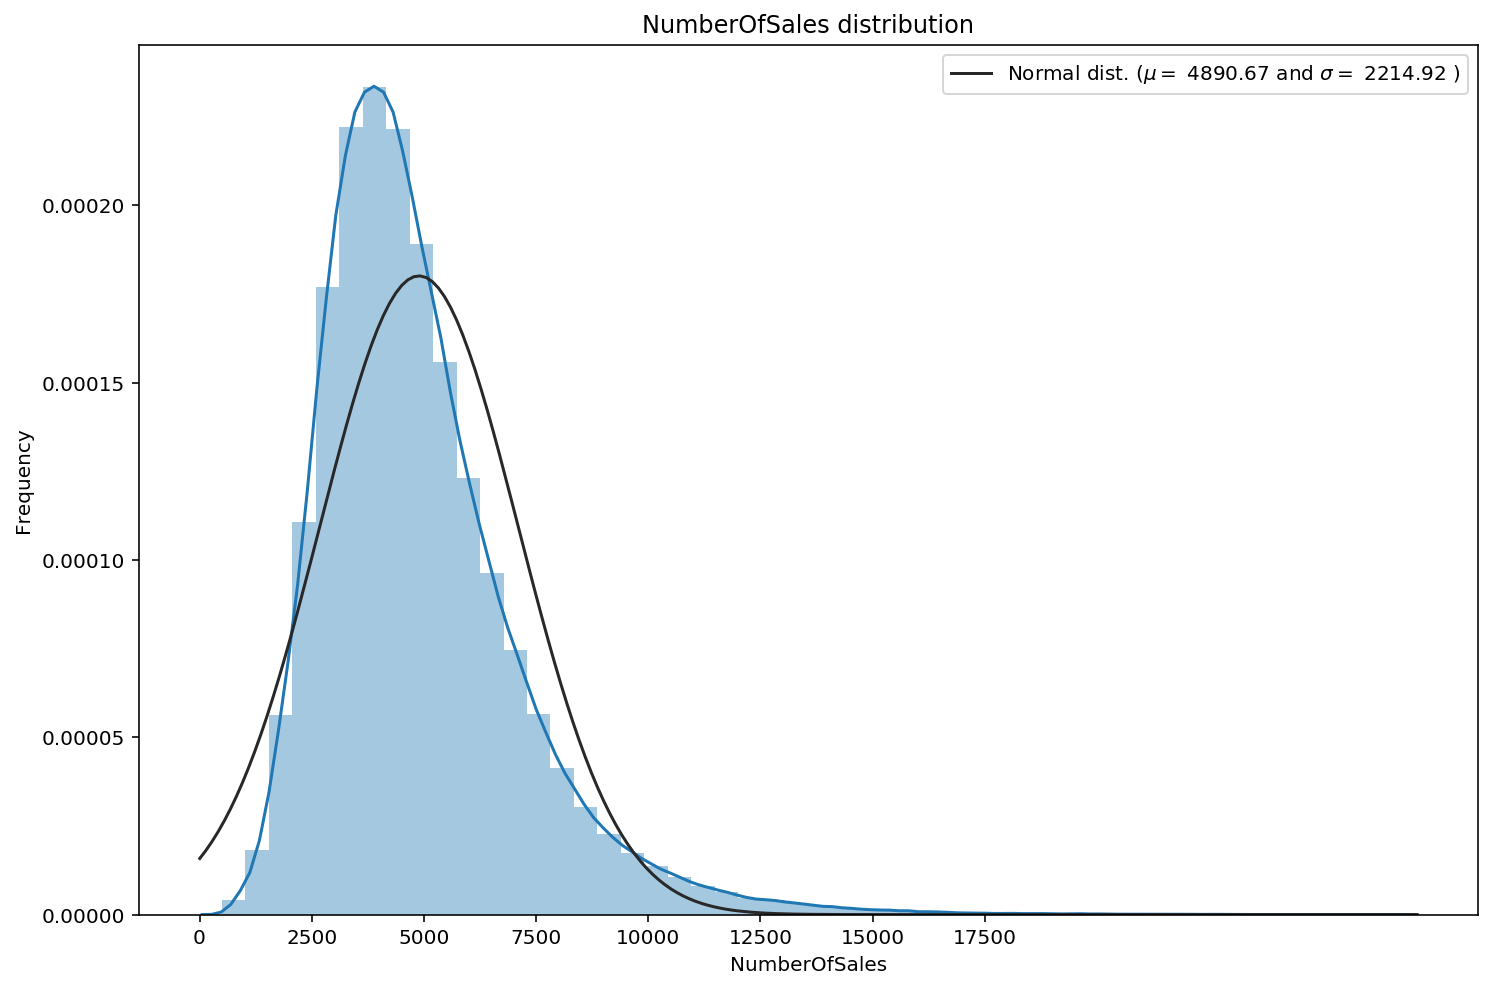

In [6]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
# Try and fit the data with a normal distribution
sns.distplot(high_numberofsales['NumberOfSales'] , fit=norm)

(mu, sigma) = norm.fit(high_numberofsales['NumberOfSales'])
print( '\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % high_numberofsales['NumberOfSales'].skew())
print("Kurtosis: %f" % high_numberofsales['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')
_ = plt.xticks(np.arange(0, 20000, step=2500))

We can normalize the data.

C:\Users\Irons\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Irons\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 8.40 and sigma = 0.43

Skewness: -0.127125
Kurtosis: 0.524235


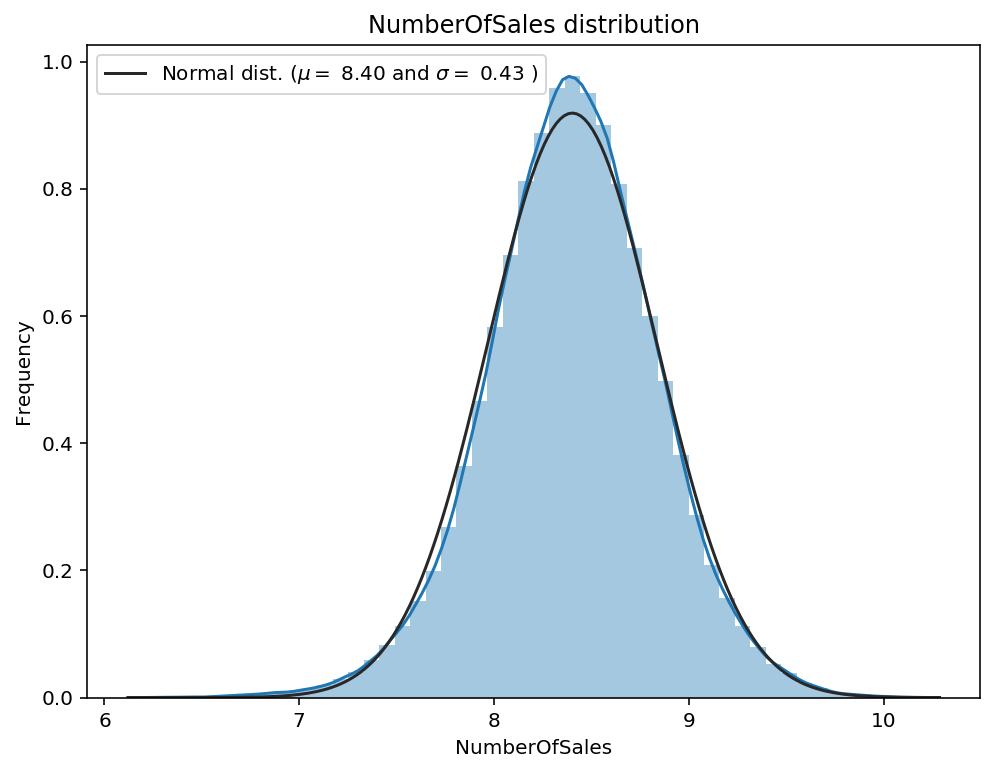

In [7]:
# We use the numpy fuction log1p which applies log(1+x) to all elements of the column
high_numberofsales["NumberOfSales"] = np.log1p(high_numberofsales["NumberOfSales"])
(mu, sigma) = norm.fit(high_numberofsales["NumberOfSales"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % high_numberofsales["NumberOfSales"].skew())
print("Kurtosis: %f" % high_numberofsales["NumberOfSales"].kurt())

matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
sns.distplot(high_numberofsales["NumberOfSales"] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
_ = plt.title('NumberOfSales distribution')

We can see that this part of the data fits a normal distribution pretty well.